In [2]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [91]:
#Cargo los datos en memoria

postulantes_educacion = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

In [92]:
postulantes_genero_y_edad = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')

In [93]:
vistas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')

In [94]:
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')

In [95]:
avisos_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')

In [96]:
avisos_detalle = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

# Parte 1: Análisis de los datos: Estructura, formato, tipos de datos.


## Primer dataframe: postulantes_educacion

In [97]:
#Vistazo a la estructura del dataframe

postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [10]:
#Posee 298231 registros

postulantes_educacion.shape

(298231, 3)

In [11]:
#Renombro las columnas a un nombre más apropiado

postulantes_educacion = postulantes_educacion.rename(columns={"nombre":"gradoactual"})
postulantes_educacion.head()

,idpostulante,gradoactual,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [12]:
#Hay algun dato nulo?

postulantes_educacion.isnull().any()

idpostulante    False
gradoactual     False
estado          False
dtype: bool

In [13]:
#Existen 188752 postulantes diferentes

postulantes_educacion['idpostulante'].value_counts().size

188752

In [14]:
#La variable gradoactual es categórica, veamos cuáles son sus posibles valores. 

postulantes_educacion['gradoactual'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: gradoactual, dtype: int64

In [15]:
#Estado también es categórica, veamos sus posibles estados

postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

## Segundo dataframe: postulantes_genero_y_edad

In [16]:
#Vistazo a la estructura del dataframe

postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [17]:
#200888 registros

postulantes_genero_y_edad.shape

(200888, 3)

In [18]:
#Hay postulantes sin fecha de nacimiento cargada, luego veremos cuáles son

postulantes_genero_y_edad.isnull().any()

idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

In [19]:
#No hay postulantes repetidos en el dataframe, pero son más de los que aparecen en el postulantes_educacion. Luego hay
#postulantes que no poseen ninguna educación.

postulantes_genero_y_edad['idpostulante'].value_counts().size

200888

In [20]:
#Comprobamos los posibles valores de sexo

postulantes_genero_y_edad['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [21]:
#Vimos que hay postulantes sin fecha de nacimiento cargada, veamos cuántos son
#Tenemos 4750 postulantes sin fecha de nacimiento declarada

postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()]



,idpostulante,fechanacimiento,sexo
930,NM1J0z,NaN,MASC
1377,Z8warE,NaN,NO_DECLARA
2149,Nzj9lz,NaN,NO_DECLARA
2435,ZD5wXR,NaN,MASC
3413,8bdWrW,NaN,MASC
3655,5boBRZ,NaN,NO_DECLARA
3928,Z4z8R8,NaN,NO_DECLARA
4725,8LqOvL,NaN,NO_DECLARA
10604,epR0o2,NaN,NO_DECLARA
10623,8kwONz,NaN,NO_DECLARA


In [22]:
#Observando el formato de las fechas no nulas, vemos que existen 7 que no respetan el formato AA/MM/DD
#Dado que representan un porcentaje ínfimo del total de registros, elegimos ignorarlos para así evitar tener que 
#asumir qué fecha representan.


postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()==False].sort_values('fechanacimiento',ascending=True)

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,0004-07-19,MASC
149653,1QPQ8QL,0011-03-08,MASC
145683,dYjV0rb,0012-11-04,NO_DECLARA
130846,8M2R6pz,0024-02-09,FEM
71458,LN85Y3b,0029-05-11,MASC
56206,xkPwXwY,0031-12-11,FEM
141832,A36Npjj,0033-09-14,FEM
154559,xkdvwm0,1775-07-09,MASC
164618,96X1loa,1917-07-08,MASC
156483,4rP8l0R,1921-08-18,FEM


In [23]:
#Convierto la columna fechanacimiento a formato datetime. 

postulantes_genero_y_edad['fechanacimiento'] = pd.to_datetime(postulantes_genero_y_edad['fechanacimiento'], errors='coerce')

In [24]:
#Si revisamos ahora a los postulantes sin fecha de nacimiento, observamos que ahora hay 7 más que antes. Estos 7 deberían ser
#los que tenían el formato incorrecto.

postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()]

,idpostulante,fechanacimiento,sexo
930,NM1J0z,NaT,MASC
1377,Z8warE,NaT,NO_DECLARA
2149,Nzj9lz,NaT,NO_DECLARA
2435,ZD5wXR,NaT,MASC
3413,8bdWrW,NaT,MASC
3655,5boBRZ,NaT,NO_DECLARA
3928,Z4z8R8,NaT,NO_DECLARA
4725,8LqOvL,NaT,NO_DECLARA
10604,epR0o2,NaT,NO_DECLARA
10623,8kwONz,NaT,NO_DECLARA


In [25]:
#Tal como lo anticipamos, ahora tienen fecha de nacimiento nula.

postulantes_genero_y_edad.iloc[[148638,149653,145683,130846,71458,56206,141832],:]

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,NaT,MASC
149653,1QPQ8QL,NaT,MASC
145683,dYjV0rb,NaT,NO_DECLARA
130846,8M2R6pz,NaT,FEM
71458,LN85Y3b,NaT,MASC
56206,xkPwXwY,NaT,FEM
141832,A36Npjj,NaT,FEM


In [26]:
#Vamos ahora a agregar una columna adicional al dataframe, de modo que podamos observar la edad de cada persona

postulantes_genero_y_edad['edad'] = ((pd.datetime.today() - postulantes_genero_y_edad['fechanacimiento']).dt.days/365)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].astype(int)
postulantes_genero_y_edad

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,47
1,5awk,1962-12-04,FEM,55
2,ZaO5,1978-08-10,FEM,39
3,NdJl,1969-05-09,MASC,48
4,eo2p,1981-02-16,MASC,37
5,Ez8J,1968-12-18,MASC,49
6,aOQq,1966-07-16,MASC,51
7,8BkL,1976-07-21,FEM,41
8,1d2B,1976-02-28,MASC,42
9,NPBx,1981-03-09,MASC,37


In [27]:
#Reviso la edad de las personas que cumplen años el 29/02

postulantes_nacidos_en_febrero = postulantes_genero_y_edad.loc[postulantes_genero_y_edad['fechanacimiento'].dt.month == 2]
postulantes_nacidos_en_febrero.loc[postulantes_nacidos_en_febrero['fechanacimiento'].dt.day == 29].sort_values('fechanacimiento',ascending = False)

,idpostulante,fechanacimiento,sexo,edad
197120,6rP38R3,2000-02-29,FEM,18
194211,3NP3dAJ,2000-02-29,FEM,18
186798,Bm5dkzR,2000-02-29,MASC,18
99625,xka3KJz,1996-02-29,MASC,22
73390,KBzQ4EX,1996-02-29,FEM,22
129557,rm05XGO,1996-02-29,FEM,22
129283,pzMVjZL,1996-02-29,FEM,22
128947,BmB6zNR,1996-02-29,MASC,22
118090,5mdVq4X,1996-02-29,FEM,22
111994,4rdGeJA,1996-02-29,FEM,22


# Tercer dataframe: vistas

In [28]:
#Vistazo a la estructura del dataframe

vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [29]:
#El dataframe posee 961897 registros

vistas.shape

(961897, 3)

In [30]:
#No tenemos registros nulos

vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

In [31]:
#En este dataframe tenemos 7459 avisos únicos 

vistas['idAviso'].value_counts().size

7458

In [32]:
#Y de los 200888 postulantes del dataset, solamente 87443 han visto al menos un aviso

vistas['idpostulante'].value_counts().size

87443

In [33]:
#Ordeno la informacion sobre la fecha y hora de visualizaciones, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])
vistas['fechavisualizacion'] = vistas['timestamp'].dt.date
vistas['horavisualizacion'] = vistas['timestamp'].dt.time
vistas.sort_values('fechavisualizacion')

,idAviso,timestamp,idpostulante,fechavisualizacion,horavisualizacion
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18:38:13.187000
31485,1112341841,2018-02-23 21:51:51.982,ekormbo,2018-02-23,21:51:51.982000
31486,1112200601,2018-02-23 21:51:52.505,OqmKPMx,2018-02-23,21:51:52.505000
31487,1112359762,2018-02-23 21:51:53.945,dY5xDpa,2018-02-23,21:51:53.945000
31488,1112359762,2018-02-23 21:51:55.853,dY5xDpa,2018-02-23,21:51:55.853000
31489,1112325077,2018-02-23 21:51:56.130,LNMLjrb,2018-02-23,21:51:56.130000
31490,1112206678,2018-02-23 21:51:58.159,W9WedvX,2018-02-23,21:51:58.159000
31491,1112358985,2018-02-23 21:51:58.338,VNljdJj,2018-02-23,21:51:58.338000
31492,1112356859,2018-02-23 21:52:01.285,bOJwJp4,2018-02-23,21:52:01.285000
31493,1112359793,2018-02-23 21:52:01.696,8MaQjP3,2018-02-23,21:52:01.696000


# Cuarto dataframe: postulaciones

In [34]:
#Vistazo a la estructura del dataframe

postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [35]:
#Tenemos 3401623 registros

postulaciones.shape

(3401623, 3)

In [36]:
#No hay registros nulos

postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [37]:
#Tenemos 12692 avisos con al menos una postulacion

postulaciones['idaviso'].value_counts().size

12692

In [38]:
#Todos los postulantes del dataset se han postulado al menos a un aviso

postulaciones['idpostulante'].value_counts().size

200888

In [39]:
##Ordeno la informacion sobre la fecha y hora de postulación, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones = postulaciones.rename(columns={'fechapostulacion':'fechahorapostulacion'})
postulaciones['fechapostulacion'] = postulaciones['fechahorapostulacion'].dt.date
postulaciones['horapostulacion'] = postulaciones['fechahorapostulacion'].dt.time

postulaciones.sort_values('fechapostulacion')

,idaviso,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16:22:34
736839,1112261550,qekqr4b,2018-01-15 19:00:07,2018-01-15,19:00:07
2524985,1112145604,N5Doal,2018-01-15 11:48:56,2018-01-15,11:48:56
2524984,1112239063,N5Doal,2018-01-15 11:44:57,2018-01-15,11:44:57
736893,1112257631,PmV48YJ,2018-01-15 10:12:34,2018-01-15,10:12:34
736894,1112261524,PmV48YJ,2018-01-15 16:26:58,2018-01-15,16:26:58
736941,1112245598,KBAvVxX,2018-01-15 22:41:33,2018-01-15,22:41:33
736942,1112247307,KBAvVxX,2018-01-15 22:42:12,2018-01-15,22:42:12
736943,1111936969,KBAvVxX,2018-01-15 22:42:56,2018-01-15,22:42:56
736944,1112251166,KBAvVxX,2018-01-15 22:43:08,2018-01-15,22:43:08


# Quinto dataframe: avisos_online

In [42]:
#Vistazo a la estructura del dataframe

avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [43]:
#Existen 5028 avisos

avisos_online.shape

(5028, 1)

In [44]:
#No hay registros nulos

avisos_online.isnull().any()

idaviso    False
dtype: bool

In [45]:
#Tampoco hay ids repetidos

avisos_online['idaviso'].value_counts().size

5028

# Sexto dataframe: avisos_detalle

In [46]:
#Vistazo a la estructura del dataframe

avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [47]:
#Existen 13534 avisos contra los 5028 que teniamos en avisos_online. Significa que los restantes 8506 están inactivos?

avisos_detalle.shape

(13534, 11)

In [48]:
#Tenemos nulos en los campos ciudad, mapa y denominacion_empresa

avisos_detalle.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

In [49]:
#13487 no tienen registrada la ciudad

avisos_detalle.loc[avisos_detalle['ciudad'].isnull()].shape

(13487, 11)

In [50]:
#Cinco avisos no tienen registrada la empresa que lleva a cabo la búsqueda

avisos_detalle.loc[avisos_detalle['denominacion_empresa'].isnull()].shape

(5, 11)

In [51]:
#Todos los avisos son del mismo país

avisos_detalle['idpais'].value_counts()

1    13534
Name: idpais, dtype: int64

In [52]:
#Zonas entre las que se reparten los avisos, podemos corroborar que todos los avisos 
#corresponden a Buenos Aires como dice la consigna

avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

# Parte 2: Exploración de los datos

## Postulaciones por mes


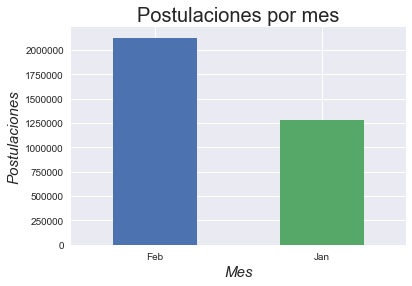

In [63]:
name_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',
       8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

postulaciones['Month'] = postulaciones['fechahorapostulacion'].dt.month.apply(lambda x: name_month[x])

postulaciones_por_mes=postulaciones['Month'].value_counts()
postulaciones_por_mes.plot(kind='bar', rot=0)
plt.title("Postulaciones por mes", size=20)
plt.xlabel("Mes",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()

## Postulaciones en el mes de enero


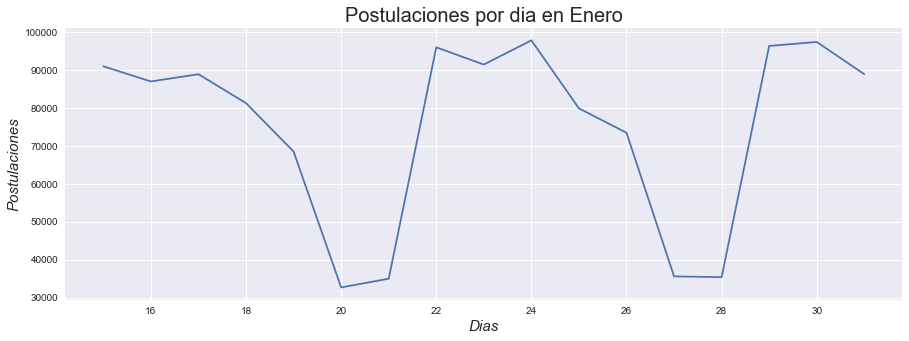

In [64]:
postulaciones['Number'] = postulaciones['fechahorapostulacion'].dt.day

df_enero = postulaciones[postulaciones['Month']=='Jan']
df_enero['Number'].value_counts().sort_index().plot(kind='line',figsize=(15,5))
plt.title("Postulaciones por dia en Enero", size=20)
plt.xlabel("Dias",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()


## Postulaciones en el mes de febrero

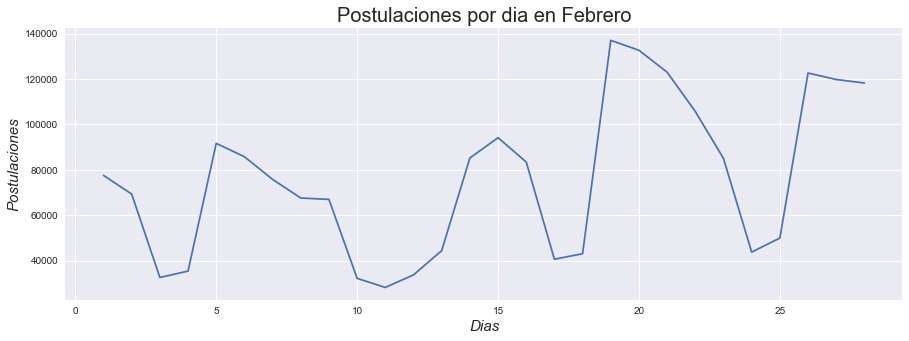

In [65]:
df_febrero = postulaciones[postulaciones['Month']=='Feb']
df_febrero['Number'].value_counts().sort_index().plot(kind='line',figsize=(15,5))
plt.title("Postulaciones por dia en Febrero", size=20)
plt.xlabel("Dias",size=15,style='italic')
plt.ylabel("Postulaciones",size=15,style='italic')
plt.show()

## Cantidad de avisos según nivel laboral 

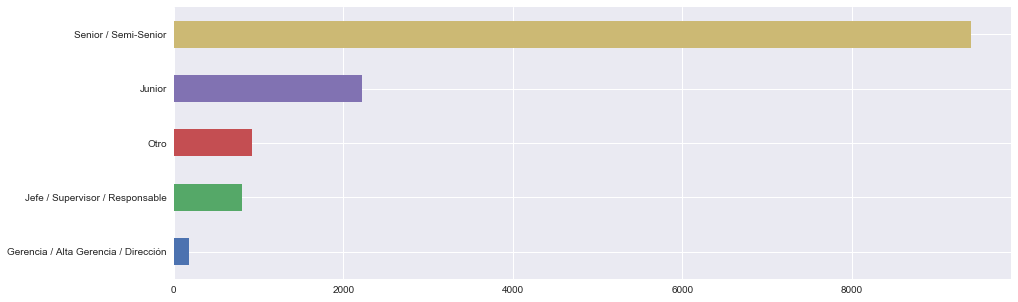

In [66]:
avisos_detalle['nivel_laboral'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,5))
plt.show()

## Cantidad de avisos por empresa 

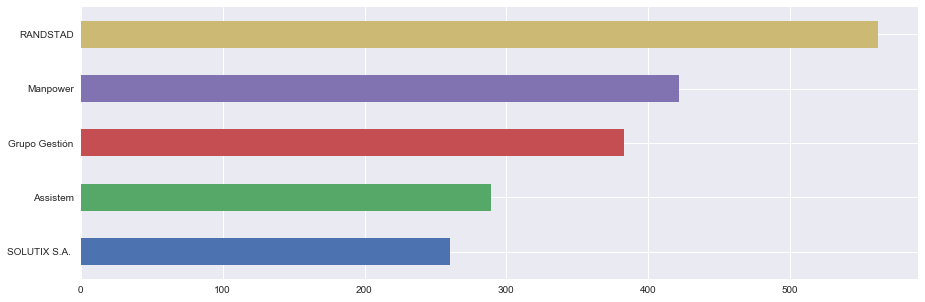

In [67]:
avisos_detalle['denominacion_empresa'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,5))
plt.show()

## Cantidad de avisos por zona 

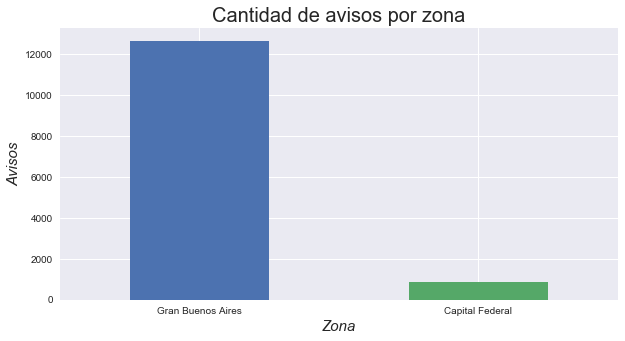

In [68]:
avisos_detalle['nombre_zona'].value_counts().head(2).plot(kind='bar',rot=0, figsize=(10,5))
plt.title("Cantidad de avisos por zona", size=20)
plt.xlabel("Zona",size=15,style='italic')
plt.ylabel("Avisos",size=15,style='italic')
plt.show()

## Cantidad de avisos por tipo de trabajo 

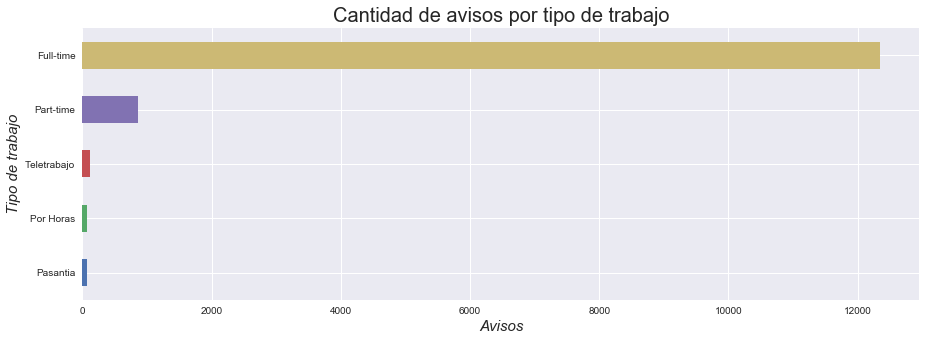

In [69]:
avisos_detalle['tipo_de_trabajo'].value_counts().head(5).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por tipo de trabajo", size=20)
plt.xlabel("Avisos",size=15,style='italic')
plt.ylabel("Tipo de trabajo",size=15,style='italic')
plt.show()

## Cantidad de avisos por area 

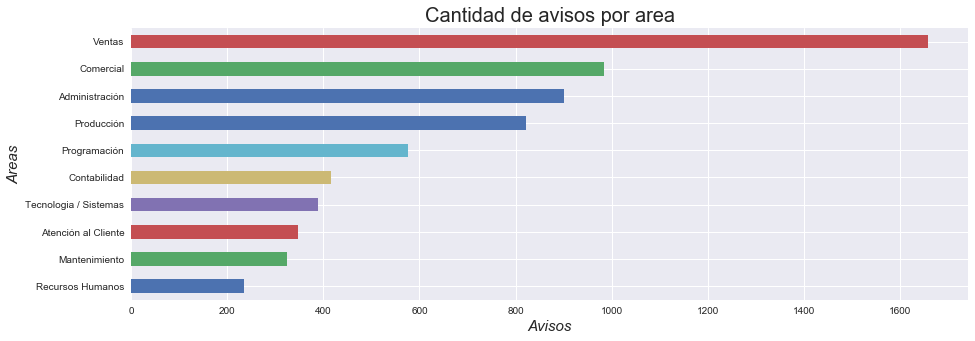

In [70]:
avisos_detalle['nombre_area'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por area", size=20)
plt.ylabel("Areas",size=15,style='italic')
plt.xlabel("Avisos",size=15,style='italic')
plt.show()

## Cantidad de postulantes por educacion y estado

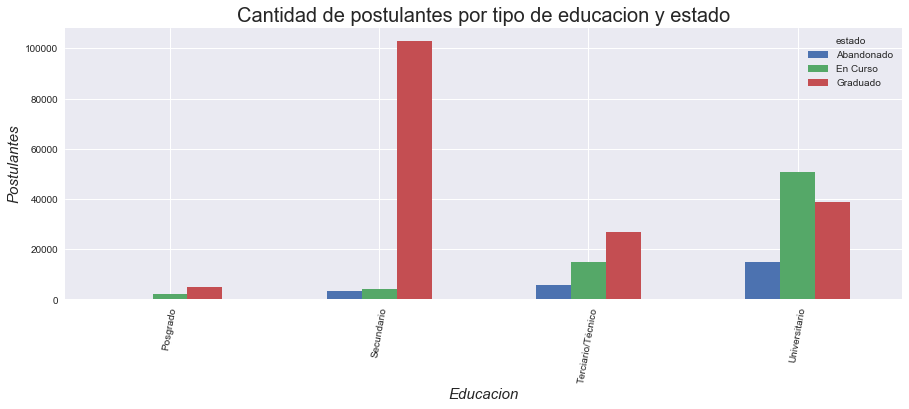

In [73]:
postulantes_educacion.groupby(['gradoactual','estado']).count().unstack()['idpostulante'].drop(['Master','Doctorado','Otro']).plot(kind='bar',rot=80, figsize=(15,5))
plt.title("Cantidad de postulantes por tipo de educacion y estado", size=20)
plt.xlabel("Educacion",size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

## Años de nacimiento con mayores postulantes  

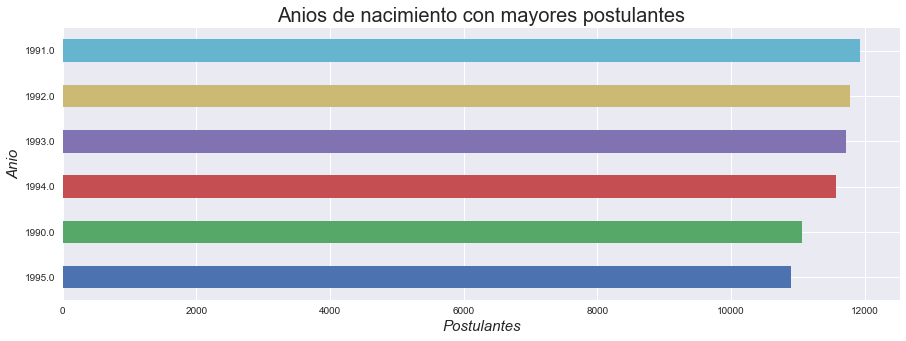

In [75]:
postulantes_genero_y_edad['fechanacimiento'].dt.year.value_counts().head(6).sort_values().plot(kind='barh', figsize=(15,5))
plt.title("Anios de nacimiento con mayores postulantes", size=20)
plt.xlabel("Postulantes", size=15,style='italic')
plt.ylabel("Anio",size=15,style='italic')
plt.show()

## Postulantes por genero

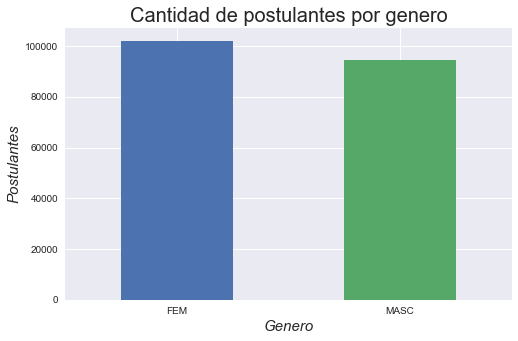

In [76]:
postulantes_genero_y_edad['sexo'].value_counts().drop('NO_DECLARA').plot(kind='bar',rot=0,figsize=(8,5))
plt.title("Cantidad de postulantes por genero",size=20)
plt.xlabel("Genero",size=15,style='italic')
plt.ylabel("Postulantes",size=15,style='italic')
plt.show()

## Revisar 

In [78]:
#De 1990 a 1995 son los años de nacimiento con los mayores postulantes

#df_mas_post = postulantes_genero_y_edad[(postulantes_genero_y_edad['fechanacimiento'] >= datetime(1990,1,1)) & ((postulantes_genero_y_edad['fechanacimiento']) < datetime(1996,1,1))]
#df_mas_post['anio'] = df_mas_post.loc[:,'fechanacimiento'].dt.year
#df_mas_post.groupby(['anio','sexo']).count().unstack()['idpostulante'].drop('NO_DECLARA',axis=1).plot(kind='bar',rot=0,figsize=(15,5))
#plt.title("Diferencia entre generos en los años de nacimiento con mas postulantes", size=20)
#plt.xlabel("Año",size=15,style='italic')
#plt.ylabel("Postulantes",size=15,style='italic')
#plt.show()

## Areas mas vistas en general

In [79]:
df_avisos_detalle_min = avisos_detalle.drop(['titulo','idpais','descripcion','ciudad','mapacalle','denominacion_empresa'],axis=1)
df_avisos_detalle_min.head()

,idaviso,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area
0,8725750,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial
1,17903700,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud
2,1000150677,Capital Federal,Full-time,Senior / Semi-Senior,Transporte
3,1000610287,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte
4,1000872556,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Producción


In [82]:
df_merge = postulantes_genero_y_edad.merge(vistas,how='inner',on='idpostulante').drop('timestamp', axis=1).rename(str.lower, axis=1)
df_merge = df_merge.merge(df_avisos_detalle_min,how='inner',on='idaviso')
df_merge = df_merge.merge(postulantes_educacion,how='inner',on='idpostulante').rename({'nombre':'educacion'}, axis=1)
df_merge.head()

,idpostulante,fechanacimiento,sexo,edad,idaviso,fechavisualizacion,horavisualizacion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,gradoactual,estado
0,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,20:53:48.610000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
1,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,20:53:48.610000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
2,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:05.411000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
3,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:05.411000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
4,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:04.673000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado


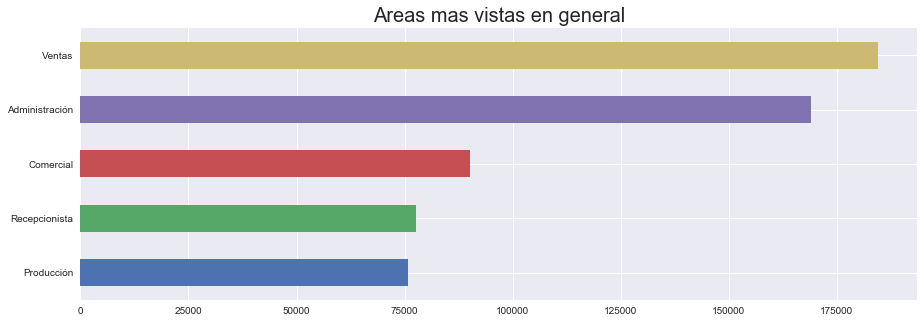

In [83]:
df_merge['nombre_area'].value_counts().head().sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas en general", size=20)
plt.show()

## Areas mas vistas por el genero fememino 

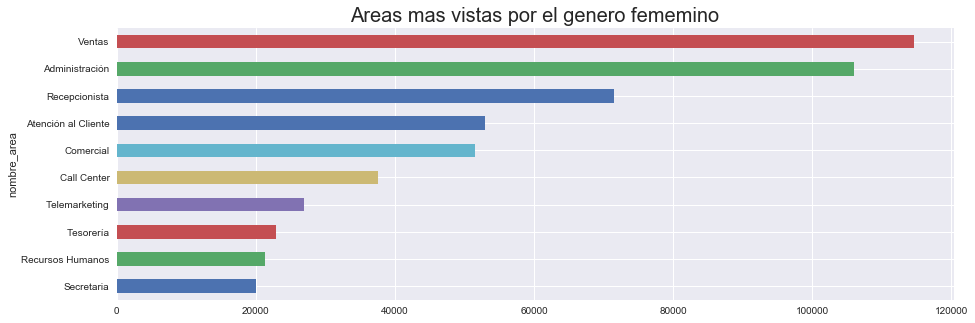

In [84]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['FEM'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero fememino", size=20)
plt.show()

## Areas mas vistas por el genero masculino 

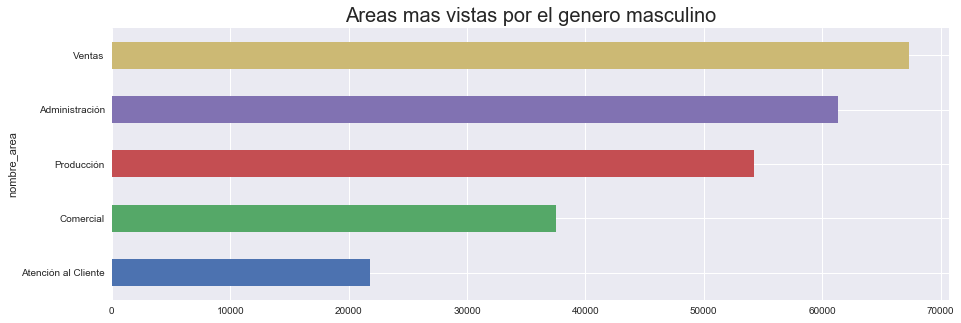

In [85]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['MASC'].sort_values(ascending=False).head().sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero masculino", size=20)
plt.show()

## Areas mas vistas, universitarios 

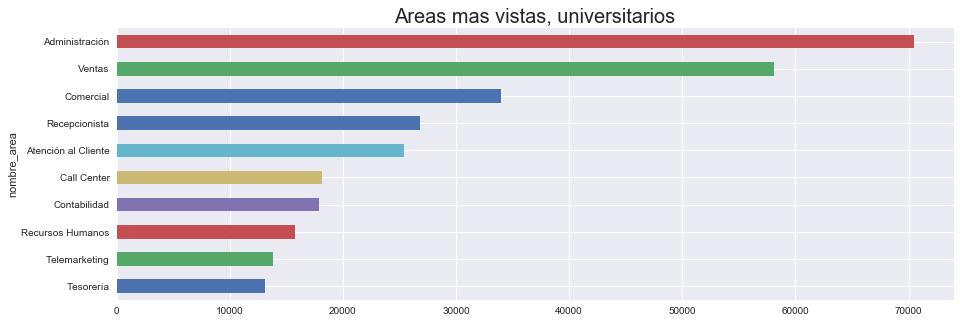

In [88]:
df_merge.groupby(['gradoactual','nombre_area']).count()['idpostulante']['Universitario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, universitarios", size=20)
plt.show()

## Areas mas vistas, secundario 

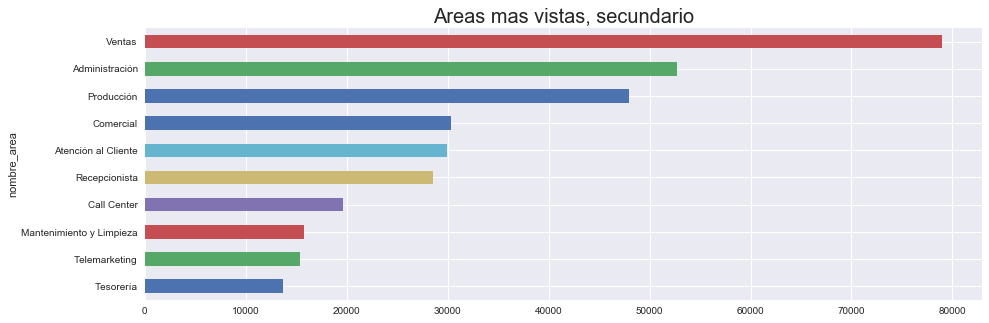

In [89]:
df_merge.groupby(['gradoactual','nombre_area']).count()['idpostulante']['Secundario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, secundario", size=20)
plt.show()

## Cantidad de postulantes por tipo de educacion 

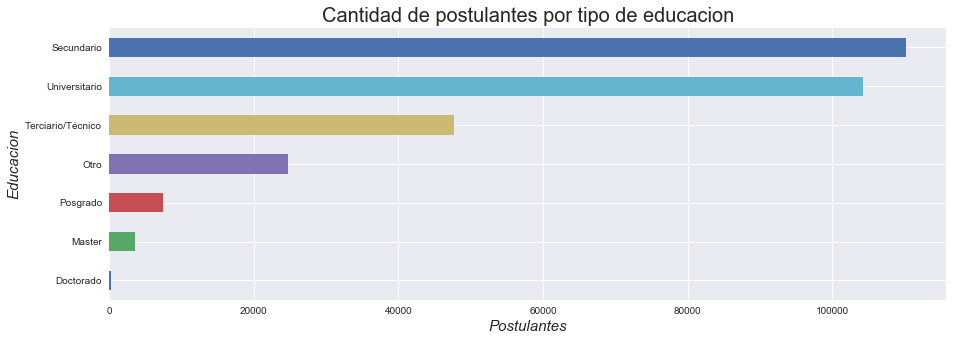

In [90]:
postulantes_educacion['gradoactual'].value_counts(ascending=True).plot(kind='barh', figsize=(15,5))
plt.title("Cantidad de postulantes por tipo de educacion",size=20)
plt.ylabel("Educacion",size=15,style='italic')
plt.xlabel("Postulantes",size=15,style='italic')
plt.show()

## ¿Se ven afectadas las postulaciones según el día de la semana en el que estamos?

In [ ]:
#Vamos a responder a la pregunta, para ello pimero necesito identificar en qué día de la semana se realizó cada una
#de las postulaciones del set de datos

postulaciones['diapostulacion'] = postulaciones['fechahorapostulacion'].dt.weekday_name
postulaciones

In [ ]:
#Veamos cómo se distribuyen las postulaciones según en qué día de la semana estamos

postulaciones_segun_dia = postulaciones['diapostulacion'].value_counts()
postulaciones_segun_dia

In [ ]:
#Ahora lo volcamos a un gráfico para comunicar el resultado.
#La respuesta a la pegunta que formulamos claramente es sí.
#Podemos ver cómo decae la actividad durante la segunda mitad de la semana y cómo se concentra en sus 
#primeros tres días hábiles.

plot = postulaciones_segun_dia.plot(kind="barh", figsize=(15,8),grid=True)
plot.set_title('Postulaciones segun dia de la semana',fontsize=30)
plot.set_xlabel("Cantidad de postulaciones",fontsize=18)
plot.set_ylabel("Dia de la semana", fontsize=18)

## Actividad durante el dia más concurrido de la semana

In [ ]:
#Obtengo todas las postulaciones de los miércoles

postulaciones_miercoles = postulaciones.loc[postulaciones['diapostulacion'] == 'Wednesday']

In [ ]:
#Vemos que el pico de postulaciones se produce durante el transcurso de las 9 AM y a partir de allí sigue una tendencia
#descendente salvo una ligera remontada a las 13 hs (Break para almorzar?)

plot = postulaciones_miercoles['fechahorapostulacion'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(15,8), grid=True)
plot.set_title('Postulaciones de los miercoles  segun hora del dia',fontsize=30)
plot.set_xlabel("Hora del dia",fontsize=18)
plot.set_ylabel("Cantidad de postulaciones", fontsize=18)

# Top 10 áreas de trabajo con más postulaciones

In [31]:
#Para averiguarlo, vamos a tener que juntar el df de postulaciones con el de avisos_detalle

postulaciones_x_avisos_detalle = pd.merge(avisos_detalle, postulaciones, on='idaviso', how='inner')
postulaciones_x_avisos_detalle

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,4rWEjrA,2018-01-16 21:58:40,2018-01-16,21:58:40
1,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,qewD0aR,2018-02-06 15:51:54,2018-02-06,15:51:54
2,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,3N2dBdq,2018-02-08 10:49:43,2018-02-08,10:49:43
3,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,0zkx2dY,2018-02-07 06:32:25,2018-02-07,06:32:25
4,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,ZDrdPVR,2018-01-15 09:23:40,2018-01-15,09:23:40
5,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,VNrwDqm,2018-02-04 07:48:44,2018-02-04,07:48:44
6,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,X95eqmJ,2018-02-08 11:10:17,2018-02-08,11:10:17
7,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,ow2J8XW,2018-01-15 23:13:58,2018-01-15,23:13:58
8,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,A3XKmOm,2018-01-17 13:31:48,2018-01-17,13:31:48
9,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,ewmKe8,2018-01-21 11:35:46,2018-01-21,11:35:46


In [32]:
#Obtengo las diez areas con mas postulaciones

top_10_areas_con_mas_postulaciones = postulaciones_x_avisos_detalle.groupby('nombre_area').agg({'idaviso':'count'}).sort_values('idaviso',ascending=False).head(10)

Text(0,0.5,u'Area de trabajo')

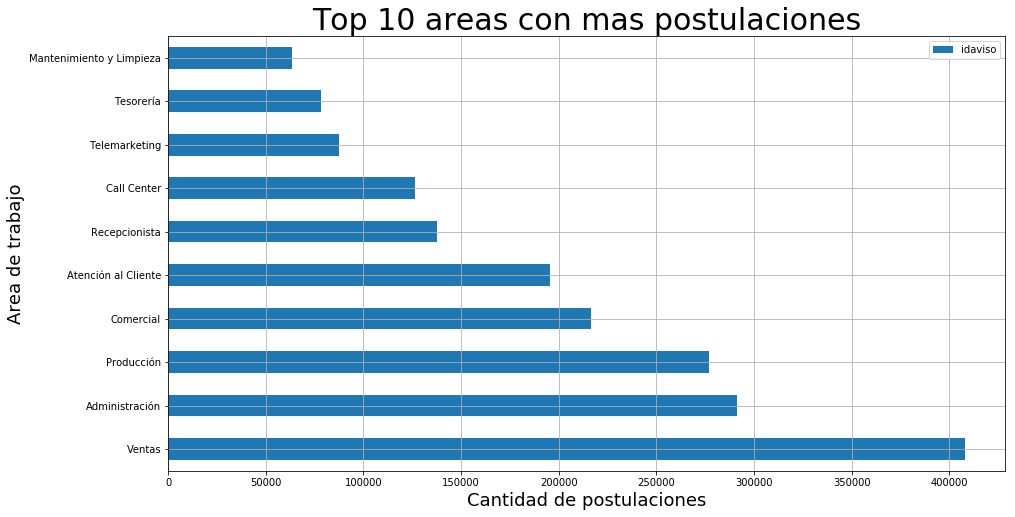

In [34]:
#Podemos observar que más del 50% de las postulaciones se reparten entre las áreas de call center, 
#recepcionista, atención al cliente, comercial, producción, administración y ventas.

plot = top_10_areas_con_mas_postulaciones.plot(kind='barh',grid=True,figsize=(15,8))
plot.set_title('Top 10 areas con mas postulaciones',fontsize=30)
plot.set_xlabel("Cantidad de postulaciones",fontsize=18)
plot.set_ylabel("Area de trabajo", fontsize=18)

# Distribucion de edades de postulantes dentro de las 10 áreas más populares


In [35]:
#Voy a seguir usando el mismo df que obtuve del merge anterior, ahora lo junto con postulantes_genero_y_edad para obtener las 
#edades de quienes postulan

postulaciones_x_avisos_detalle_x_postulantes = pd.merge(postulaciones_x_avisos_detalle, postulantes_genero_y_edad, on='idpostulante', how='inner')

In [94]:
#Del dataframe que acabo de formar me quedo solamente con los registros que pertenecen a las diez areas observadas

#TODO: Cambiar B por un nombre mas descriptivo

top_10_areas_con_mas_postulaciones = top_10_areas_con_mas_postulaciones.reset_index()
B = pd.merge(postulaciones_x_avisos_detalle_x_postulantes, top_10_areas_con_mas_postulaciones, on='nombre_area', how='inner')

In [37]:
B

,idaviso_x,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion,fechanacimiento,sexo,edad,idaviso_y
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,4rWEjrA,2018-01-16 21:58:40,2018-01-16,21:58:40,1984-06-08,MASC,33,216677
1,1112160508,1,Ejecutivo/a de Ventas para atender clientes re...,"<p> </p><p style=""""><strong><span style="""">Ade...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Adecco -Región Litoral,4rWEjrA,2018-01-15 22:46:36,2018-01-15,22:46:36,1984-06-08,MASC,33,216677
2,1112293493,1,Asesor Comercial SSR - Teletrabajo. Rosario,<p><em><strong>Para prestigiosa firma dedicada...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Senior / Semi-Senior,Comercial,Complement Group (holding),4rWEjrA,2018-02-20 12:11:26,2018-02-20,12:11:26,1984-06-08,MASC,33,216677
3,1112241972,1,Ejecutivo de cuentas para empresa de tecnologi...,<p>Entre sus tareas mas importantes se encuent...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Manpower,4rWEjrA,2018-02-15 22:38:24,2018-02-15,22:38:24,1984-06-08,MASC,33,216677
4,1112336366,1,Ejecutivo de Ventas (Rosario),"<p><span lang=""ES"">LoJack se encuentra en búsq...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Lo Jack,4rWEjrA,2018-02-15 22:39:56,2018-02-15,22:39:56,1984-06-08,MASC,33,216677
5,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,qewD0aR,2018-02-06 15:51:54,2018-02-06,15:51:54,1990-12-05,FEM,27,216677
6,1112297670,1,Carnicero para Supermercado de Granadero Baigo...,<p>CMS Recursos Humanos selecciona para Superm...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Comercial,CMS Recursos Humanos,qewD0aR,2018-01-30 13:14:24,2018-01-30,13:14:24,1990-12-05,FEM,27,216677
7,1112359379,1,OFICIAL BANCA DE EMPRESAS JR. - SUC. SANTA FE,"<p style="""">OFICIAL BANCA DE EMPRESAS JR. SUC....",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Comercial,BBVA Francés,qewD0aR,2018-02-26 04:17:00,2018-02-26,04:17:00,1990-12-05,FEM,27,216677
8,1112305196,1,Gerente Comercial,<p>Estamos buscando para importante empresa un...,Gran Buenos Aires,NaN,NaN,Full-time,Gerencia / Alta Gerencia / Dirección,Comercial,RANDSTAD,qewD0aR,2018-02-14 06:46:04,2018-02-14,06:46:04,1990-12-05,FEM,27,216677
9,1112256927,1,Gerente Comercial,"<p><span style="""">Para Importante Empresa Cons...",Gran Buenos Aires,NaN,NaN,Full-time,Gerencia / Alta Gerencia / Dirección,Comercial,Consultora Persona,qewD0aR,2018-01-16 02:18:06,2018-01-16,02:18:06,1990-12-05,FEM,27,216677


In [42]:
#Tabla pivot para poder graficar un heatmap

C=B.pivot_table(index='edad', columns='nombre_area', values='idaviso_x', aggfunc='count')

In [59]:
#Cambio los nombres de las columnas para evitar problemas con las tildes

C=C.rename(columns={'Administración':'Administracion','Atención al Cliente':'Atencion al Cliente','Producción':'Produccion','Tesorería':'Tesoreria'})

Text(85.3,0.5,u'Edad del postulante')

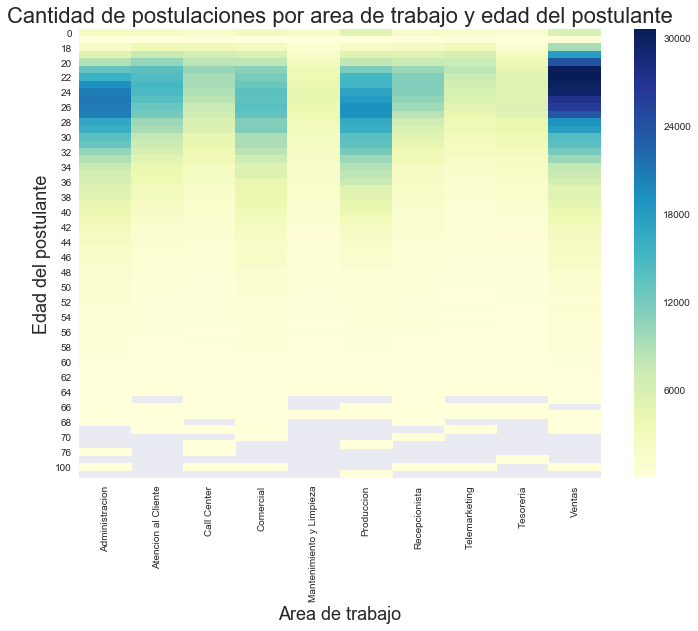

In [92]:
#Distribucion de postulantes por area segun edad de los mismos

#TODO: Limpiar la tabla C, postulantes con edad 0 no tienen sentido por ejemplo.

g = sns.heatmap(C,  cmap="YlGnBu")
g.set_title("Cantidad de postulaciones por area de trabajo y edad del postulante", fontsize=22)
g.set_xlabel("Area de trabajo",fontsize=18)
g.set_ylabel("Edad del postulante", fontsize=18)